# Classification Evaluation (Sklearn)

분류 문제(binary/multi-class/multi-label)에서 데이터를 통해 생성한 모델이 좋은지 판단하기 위해 자주사용하는 평가 함수에 대해서 알아봅니다. 

## Accuracy score

Accuracy score 는 실제 값과 예측 값이 일치하는 비율 또는 갯수를 나타냅니다.

\\[
\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)
\\]

이는 multi-label 분류 문제에서도 동일하게 사용됩니다.

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

# Multi-class
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

acc = accuracy_score(y_true, y_pred)
print("Accuracy={}".format(acc))

acc = accuracy_score(y_true, y_pred, normalize=False)
print("Accuracy(normalize=False)={}".format(acc))

# Multi-label
y_pred = np.array([[0, 1, 1], [1, 1, 0]])
y_true = np.array([[1, 1, 0], [1, 1, 0]])

acc = accuracy_score(y_true, y_pred)
print("Accuracy={}".format(acc))

Accuracy=0.5
Accuracy(normalize=False)=2
Accuracy=0.5


## Balanced accuracy score

Balanced accuracy score 는 imblanced dataset 에서 성능을 측정할때 사용합니다. 이는 accuracy를 클래스의 비율에 따라 조절한 accuracy를 뜻하며 classification_report 결과에서 recall score 의 macro avg 값과 같습니다.

In [2]:
from sklearn.metrics import balanced_accuracy_score, classification_report
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]

acc = accuracy_score(y_true, y_pred)
print("Accuracy={}".format(acc))

bacc = balanced_accuracy_score(y_true, y_pred)
print("Balanced Accuracy={}".format(bacc))

report = classification_report(y_true, y_pred)
print("\nClassification Report\n{}".format(report))

Accuracy=0.6666666666666666
Balanced Accuracy=0.625

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



## Confusion matrix

Confusion matrix는 Predicted Class/Label 대비 True Class/Label 의 Count를 matrix 형태로 나타낸 것입니다. 

Multi-class 의 경우 Column Index 가 Predicted Class이고, Row Index 가 True Class를 나타내고 Correct Count 값이 채워집니다. 

Multi-label 의 경우는 Row 기준으로 각 Label 의 tp, tn, fp, fn 값이 채워집니다.

|Actual/Predicted  |Predicted Negative |Predicted Positive  |
|:----------------:|:-----------------:|:------------------:|
|Actual Negative   |tn (true negative) |fp (false positive) |
|Actual Positive   |fn (false negative)|tp (true positive)  |

이는 각 경우에 대해서 Evaluation 함수를 계산하기 위한 값이 됩니다.

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# Multi-class
y_pred = [0, 2, 1, 3, 2, 3, 1]
y_true = [0, 1, 2, 3, 1, 3, 1]

cm = confusion_matrix(y_true, y_pred)
print("Multi-class Confusion Matrix\n{}".format(cm))

# Multi-label
y_pred = np.array([[0, 1, 1], [1, 1, 0], [1, 1, 0]])
y_true = np.array([[1, 1, 0], [1, 1, 0], [1, 1, 0]])

mcm = multilabel_confusion_matrix(y_true, y_pred)
print("Multi-label Confusion Matrix\n{}".format(mcm))

Multi-class Confusion Matrix
[[1 0 0 0]
 [0 1 2 0]
 [0 1 0 0]
 [0 0 0 2]]
Multi-label Confusion Matrix
[[[0 0]
  [1 2]]

 [[0 0]
  [0 3]]

 [[2 1]
  [0 0]]]


Multi-class 경우의 Confusion Matrix를 아래와 같이 시각화하여 나타내기도 합니다.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


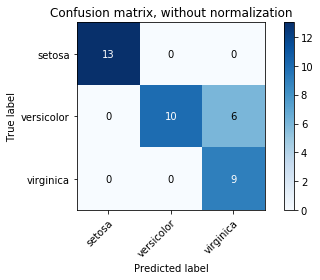

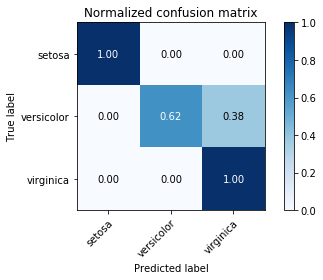

In [4]:
# 참조: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Classification report

Classification Report 에서는 Classification의 주요 성능 지표에 대한 결과를 테이블 형태로 출력해줍니다. 

In [5]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 0, 1, 1]
y_pred = [0, 0, 2, 1, 0, 1, 1]
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.67      0.67      0.67         3
     class 2       1.00      0.50      0.67         2

    accuracy                           0.71         7
   macro avg       0.78      0.72      0.71         7
weighted avg       0.76      0.71      0.70         7



#### Precision, recall and F-measures

**Binary Classification** 에서는 Precision, Recall, F-Measure 를 계산하기 위해 tp, fp, fn, tn 을 아래와 같이 정의하고 각 Metric을 계산합니다.

|Predicted/Actual  |Actual Positive    |Actual Negative     |
|:----------------:|:-----------------:|:------------------:|
|Predicted Positive|tp (true positive) |fp (false positive) |
|Predicted Negative|fn (false negative)|tn (true negative)  |

* tp (true positive): Positive로 예측한 것이 True인 경우 (실제도 Positive 인 경우)
* tn (true negative): Negative로 예측한 것이 True인 경우 (실제도 Negative 인 경우)
* fp (false positive): Positive로 예측한 것이 False인 경우 (실제는 Negative 인 경우) 
* fn (false negative): Negative로 예측한 것이 False인 경우 (실제는 Positive 인 경우)

**Precision**

Positive로 예측한 것중에 실제 Positive 인 경우의 비율입니다. 

\\[
\text{precision} = \frac{tp}{tp + fp}
\\]

**Recall**

실제 Positive 인 경우 중 Positive 로 예측한 것이 True 인 경우의 비율입니다.

\\[
\text{recall} = \frac{tp}{tp + fn}
\\]

**F-measures**

Precision과 Recall의 가중 조화 평균으로 모델의 성능을 평가합니다. 데이터에 따라 모델의 성능이 Precision이 더욱 중요한 케이스도 있고, Recall이 더욱 중요한 케이스도 있습니다. F-measure 에서는 F-beta 함수의 beta 값을 이용하여 각 케이스에 따라 Precision 과 Recall 의 중요도에 가중치를 적용하여 전체적 성능을 평가할 수 있습니다. 

\\[
F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}
\\]

예)
* beta = 1: Precision과 Recall 의 중요도가 같음
* beta = 2: Recall 이 Precision 보다 중요
* beta = 0.5: Precision 이 Recall 보다 중요  

In [6]:
from sklearn import metrics

y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]

precision = metrics.precision_score(y_true, y_pred)
print("precision={}".format(precision))
recall = metrics.recall_score(y_true, y_pred)
print("recall={}".format(recall))
f1_score = metrics.f1_score(y_true, y_pred)  
print("f1_score={}".format(f1_score))
f05_score = metrics.fbeta_score(y_true, y_pred, beta=0.5)  
print("f0.5_score={}".format(f05_score))
f1_score = metrics.fbeta_score(y_true, y_pred, beta=1)  
print("f1_score={}".format(f1_score))
f2_score = metrics.fbeta_score(y_true, y_pred, beta=2) 
print("f2_score={}".format(precision, recall, f1_score,))

precision=1.0
recall=0.5
f1_score=0.6666666666666666
f0.5_score=0.8333333333333334
f1_score=0.6666666666666666
f2_score=1.0


**Multi-Class/Label Classification** 에서는 One vs the Rest 방식으로 각 Class의 Precision, Recall, F-Measure 값을 계산합니다. 그리고 각 Class 에 대한 Metric 의 Average 값은 주어진 옵션에 따라 아래 공식과 같이 계산됩니다.

* "micro": 전제 metric 에 대해서 sample-class pair 가 동등한 기여를 기반으로 계산됩니다. (sample-weight 의 결과는 제외)
* "samples": multi-label 문제에서만 사용되며, 각 sample를 위한 true(actual)/predicted class의 metric을 대신 사용합니다. 
* "macro": 단순히 각 class의 가중치를 동등하게 binary metric의 평균으로 계산합니다. 
* "weighted": mtuli-label 또는 class imbalance를 위해 각 class가 true data sample 내에 나타나는 비율로 가중된 binary metric의 평균을 계산합니다.
* Selecting average=None: 각 class를 위한 score 배열이 반환됩니다.

각 Class/Label 의 Measure를 계산할때는 Average를 계산하여 산출하며, Average 계산방식은 아래 방식중 지정하여 계산이 가능합니다.

\\[y \text{: the set of predicted } (sample, label) \text{ pairs } \\]
\\[\hat{y} \text{: the set of true } (sample, label) \text{ pairs } \\]
\\[L \text{: the set of labels} \\]
\\[S \text{: the set of samples}\\]
\\[y_s \text{: the subset of} y \text{with sample } s, \text{ i.e. } y_s := \left\{(s', l) \in y | s' = s\right\} \\]
\\[y_l \text{:the subset of } y \text{with label } l \\]
\\[\text{similarly, } \hat{y}_s \text{and} \hat{y}_l \text{are subsets of } \hat{y} \\]
\\[P(A, B) := \frac{\left| A \cap B \right|}{\left|A\right|} \text{for some sets } A \text{ and } B \\]
\\[R(A, B) := \frac{\left| A \cap B \right|}{\left|B\right|} \text{ (Conventions vary on handling } B = \emptyset \text{; this implementation uses } R(A, B):=0 \text{, and similar for } P \\]
\\[F_\beta(A, B) := \left(1 + \beta^2\right) \frac{P(A, B) \times R(A, B)}{\beta^2 P(A, B) + R(A, B)}\\]



|average      |Precision            |Recall             |F_beta                   |
|:-----------:|:-------------------:|:-----------------:|:-----------------------:|
|"micro"      |\\[ P(y, \hat{y}) \\]|\\[R(y, \hat{y})\\]|\\[F_\beta(y, \hat{y})\\]|
|"samples"    |\\[\frac{1}{\left|S\right|} \sum_{s \in S} P(y_s, \hat{y}_s)\\]|\\[\frac{1}{\left|S\right|} \sum_{s \in S} R(y_s, \hat{y}_s)\\]|\\[\frac{1}{\left|S\right|} \sum_{s \in S} F_\beta(y_s, \hat{y}_s)\\]|
|"macro"      |\\[\frac{1}{\left|L\right|} \sum_{l \in L} P(y_l, \hat{y}_l)\\]|\\[\frac{1}{\left|L\right|} \sum_{l \in L} R(y_l, \hat{y}_l)\\]|\\[\frac{1}{\left|L\right|} \sum_{l \in L} F_\beta(y_l, \hat{y}_l)\\]|
|"weighted"   |\\[\frac{1}{\sum_{l \in L} \left|\hat{y}_l\right|} \sum_{l \in L} \left|\hat{y}_l\right| P(y_l, \hat{y}_l)\\]|\\[\frac{1}{\sum_{l \in L} \left|\hat{y}_l\right|} \sum_{l \in L} \left|\hat{y}_l\right| R(y_l, \hat{y}_l)\\]|\\[\frac{1}{\sum_{l \in L} \left|\hat{y}_l\right|} \sum_{l \in L} \left|\hat{y}_l\right| F_\beta(y_l, \hat{y}_l)\\]|
|"None"       |\\[\langle P(y_l, \hat{y}_l) | l \in L \rangle\\]|\\[\langle R(y_l, \hat{y}_l) | l \in L \rangle\\]|\\[\langle F_\beta(y_l, \hat{y}_l) | l \in L \rangle\\]|


In [7]:
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

macro_precision = metrics.precision_score(y_true, y_pred, average='macro')  
print("macro_precision={}".format(macro_precision))

micro_precision = metrics.recall_score(y_true, y_pred, average='micro')
print("micro_precision={}".format(micro_precision))

weighted_f1 = metrics.f1_score(y_true, y_pred, average='weighted')  
print("weighted_f1={}".format(weighted_f1))

macro_fbeta = metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)  
print("macro_fbeta={}".format(macro_fbeta))

none_fbeta = metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)
print("none_fbeta={}".format(none_fbeta))

macro_precision=0.2222222222222222
micro_precision=0.3333333333333333
weighted_f1=0.26666666666666666
macro_fbeta=0.23809523809523805
none_fbeta=(array([0.67, 0.  , 0.  ]), array([1., 0., 0.]), array([0.71, 0.  , 0.  ]), array([2, 2, 2]))


## Receiver operating characteristic (ROC)

ROC 커브는 이진 분류 시스템의 성능을 Positive 와 Negative 를 판별하는 Threshold 값을 다양하게 변화 시키면서 TPR(True Positive Rate)대 FPR(False Positive Rate)의 비율의 시각화하여 보여줌으로써 성능 차이를 판단할 수 있게 하는 방법입니다.

예를 들어, 두 이진 분류 모델 A, B가 존재할 경우 A 모델이 모든 Threshold 에서 ROC 의 값이 B보다 크다면 A 모델은 B 모델보다 성능이 좋다고 판단할 수 있습니다.

아래는 Multi-Class 를 Over vs the Rest 방식으로 이진 분류 모델로 학습하고 각 Class 에 대해서 테스트 데이터에 대하여 decision_function() 과 roc_curve() 함수를 이용하여 TPR, FPR, Threshold 값을 구하고 ROC Curve를 시각화화는 예제입니다.

In [9]:
# 참조: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

각 Class의 ROC Curve를 볼 수 있으며, Curve의 차이가 시각적으로 미비하다면, auc() 함수를 통해 구한 AUC (Area Under the Curve) 면적 값을 통해 하나의 값으로 비교 가능합니다.

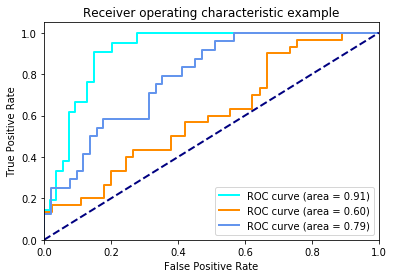

In [15]:
plt.figure()
lw = 2

plt.plot(fpr[0], tpr[0], color='aqua',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])

plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])

plt.plot(fpr[2], tpr[2], color='cornflowerblue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Multi-Class 분류 모델의 전체적인 성능을 비교하기 위해서는 각 Class 의 TPR과 FPR 값의 다양한 평균을 구하는 방식을 통해 하나의 값으로 비교가 가능하게 됩니다.

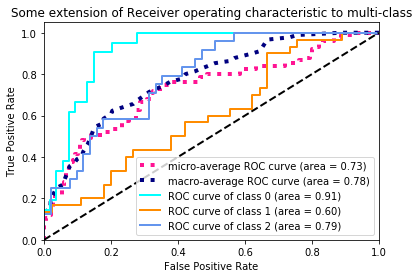

In [11]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()